<h1>hw_2</h1>
<h3>KNN을 활용한 diabetes 데이터 분석</h3>
<a href="https://www.kaggle.com/code/ghadiyaayush/diabetes-classification-using-knn/notebook">사용 자료</a>

In [98]:
import pandas as pd
import numpy as np

<h3>데이터 가시화</h3>

In [99]:
df = pd.read_csv('../practice/ML_Casestudies-master/diabetes/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [100]:
df.shape

(768, 9)

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [102]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<h3>KNN 알고리즘을 활용한 분석</h3>

In [103]:
from sklearn.model_selection import train_test_split

X = df.drop('Outcome',axis=1) # predictor feature coloumns
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [104]:
y = df['Outcome']
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [105]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 10)

print('Training Set :',len(X_train))
print('Test Set :',len(X_test))
print('Training labels :',len(y_train))
print('Test Labels :',len(y_test))

Training Set : 614
Test Set : 154
Training labels : 614
Test Labels : 154


In [106]:
from sklearn.neighbors import KNeighborsClassifier

mymodel = KNeighborsClassifier(n_neighbors=3)
mymodel.fit(X_train, y_train.values.ravel())
 
score = mymodel.score(X_test, y_test)

print(score)

0.6428571428571429


<h3>설정한 시드 값에 따른 정확도 변화 측정</h3>

In [107]:
for random_state in range(50):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)
    
    mymodel = KNeighborsClassifier(n_neighbors=3)
    mymodel.fit(X_train, y_train)
    
    score = mymodel.score(X_test, y_test)
    
    print(score)

0.7207792207792207
0.7402597402597403
0.7402597402597403
0.6818181818181818
0.7337662337662337
0.7467532467532467
0.7142857142857143
0.6883116883116883
0.6948051948051948
0.6948051948051948
0.6428571428571429
0.7012987012987013
0.6818181818181818
0.6688311688311688
0.6623376623376623
0.6688311688311688
0.6948051948051948
0.7727272727272727
0.7207792207792207
0.7467532467532467
0.6883116883116883
0.6558441558441559
0.7142857142857143
0.7792207792207793
0.6688311688311688
0.6883116883116883
0.6623376623376623
0.7272727272727273
0.7402597402597403
0.7077922077922078
0.6948051948051948
0.7272727272727273
0.7337662337662337
0.6818181818181818
0.6948051948051948
0.6883116883116883
0.6818181818181818
0.7012987012987013
0.6688311688311688
0.6038961038961039
0.7077922077922078
0.7142857142857143
0.6493506493506493
0.7272727272727273
0.7077922077922078
0.7012987012987013
0.6298701298701299
0.6818181818181818
0.7142857142857143
0.7012987012987013


<h3>Accuracy 증가시키기</h3>
<h4>시드 값에 따른 정확도 변화 측정</h4>

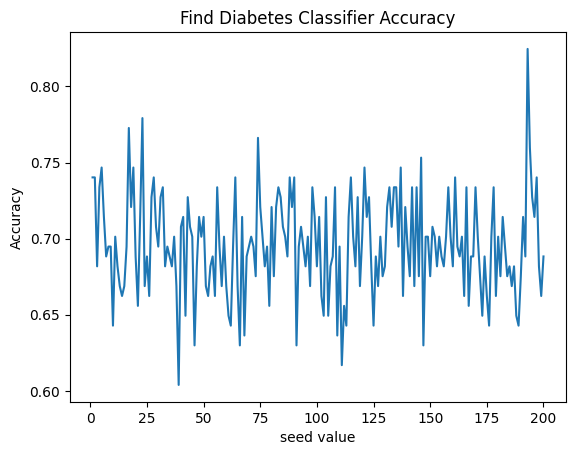

In [108]:
import matplotlib.pyplot as plt

random_state_range = range(1, 201)
find_accuracy = []

for random_state in random_state_range:
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)
  
  find_model = KNeighborsClassifier(n_neighbors = 3)
  find_model.fit(X_train, y_train.values.ravel())

  find_accuracy.append(find_model.score(X_test, y_test))
  
plt.plot(random_state_range, find_accuracy, label="training accuracy")
plt.xlabel("seed value")
plt.ylabel("Accuracy")
plt.title("Find Diabetes Classifier Accuracy")
plt.show()

In [109]:
max_accuracy = np.max(find_accuracy)
max_index = find_accuracy.index(max_accuracy)
max_random_state = random_state_range[max_index]

print(max_random_state)

193


<h4>k 값 변화에 따른 정확도 측정</h4>
<h5>(시드 값은 10으로 설정)</h5>

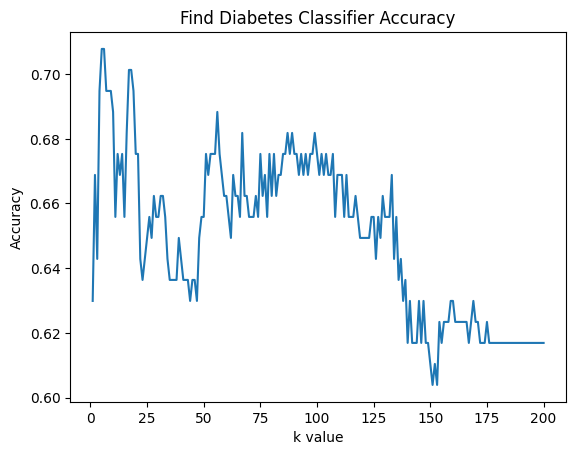

In [110]:
k_range = range(1, 201)
find_accuracy = []

for k in k_range:
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)
  
  find_model = KNeighborsClassifier(n_neighbors = k)
  find_model.fit(X_train, y_train.values.ravel())

  find_accuracy.append(find_model.score(X_test, y_test))
  
plt.plot(k_range, find_accuracy, label="training accuracy")
plt.xlabel("k value")
plt.ylabel("Accuracy")
plt.title("Find Diabetes Classifier Accuracy")
plt.show()

In [111]:
import numpy as np

max_accuracy = np.max(find_accuracy)
max_index = find_accuracy.index(max_accuracy)
max_k = k_range[max_index]

print(max_k)

5


<h5>(시드 값은 193으로 설정)</h5>

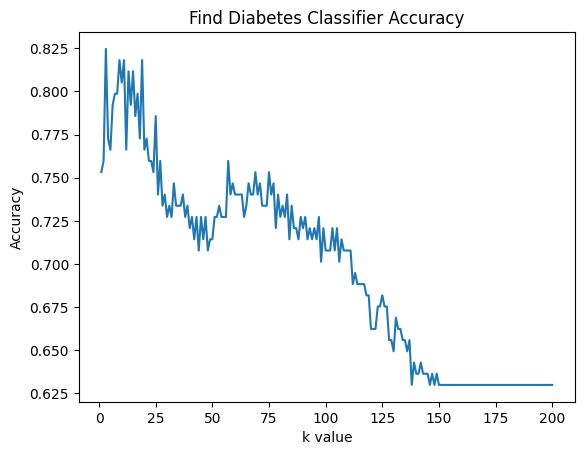

In [112]:
k_range = range(1, 201)
find_accuracy = []

for k in k_range:
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=193)
  
  find_model = KNeighborsClassifier(n_neighbors = k)
  find_model.fit(X_train, y_train.values.ravel())

  find_accuracy.append(find_model.score(X_test, y_test))
  
plt.plot(k_range, find_accuracy, label="training accuracy")
plt.xlabel("k value")
plt.ylabel("Accuracy")
plt.title("Find Diabetes Classifier Accuracy")
plt.show()

In [113]:
import numpy as np

max_accuracy = np.max(find_accuracy)
max_index = find_accuracy.index(max_accuracy)
max_k = k_range[max_index]

print(max_k)

3


<h5>가장 높은 정확성을 위해서는 시드 값의 변화 보다는 k의 값을 적합한 범위 내에서 줄여가는 것이 더욱 효과적임</h5>